# LMU Guest Lecture - David Klein, 29 Nov. 2024
Supplementary Python Jupyter Notebook with calculations (tech demo).
Q&A david.klein@lfa.de <br><br> Remark: This demo is on a "management" level. So for the most concepts, no explanation is given. Good thing, though, I will show a complete pathway towards all the relevant concepts. Together  with the slides, you will be able to understand everything while revising.
<br><br>Data: https://github.com/Polanitz/Machine-Learning-for-Default-of-Credit-Card-Clients-in-Taiwan/blob/main/default%20of%20credit%20card%20Taiwan.csv

## Use Case Presentation Credit Cart Default Prediction

In [47]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# we load the data set from on the sources & credit slide of the presentation
cc_data = pd.read_csv('./ccdata/UCI_Credit_Card_raw.csv')

# let's see what we've got 
print(cc_data.columns)

Index(['AmountOfGivenCredit', 'Gender', 'Education', 'MaritalStatus', 'Age',
       'RepaymentStatus', 'AmountOfBillStatement', 'AmountOfPreviousPayment',
       'Outcome'],
      dtype='object')


In [48]:
# first 5 rows of the data
cc_data.head()

,AmountOfGivenCredit,Gender,Education,MaritalStatus,Age,RepaymentStatus,AmountOfBillStatement,AmountOfPreviousPayment,Outcome
0,20000,Female,University,Married,24,2,3913,0,1
1,120000,Female,University,Single,26,-1,2682,0,1
2,90000,Female,University,Single,34,0,29239,1518,0
3,50000,Female,University,Married,37,0,46990,2000,0
4,50000,Male,University,Married,57,-1,8617,2000,0


In [46]:
# shape (rows and columns)
print("dimension of credit data: {}".format(cc_data.shape))

dimension of credit data: (30000, 9)


## Data Preprocessing

In [50]:
# check for missing values and data types
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AmountOfGivenCredit      30000 non-null  int64 
 1   Gender                   30000 non-null  object
 2   Education                30000 non-null  object
 3   MaritalStatus            30000 non-null  object
 4   Age                      30000 non-null  int64 
 5   RepaymentStatus          30000 non-null  int64 
 6   AmountOfBillStatement    30000 non-null  int64 
 7   AmountOfPreviousPayment  30000 non-null  int64 
 8   Outcome                  30000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.1+ MB


In [51]:
# we transform the object (string) columns to int yes/no dummy columns
cc_1 = pd.get_dummies(cc_data,columns=["Gender"])
cc_2 = pd.get_dummies(cc_1,columns=["Education"])
cc_final = pd.get_dummies(cc_2,columns=["MaritalStatus"])

In [52]:
cc_final.columns

Index(['AmountOfGivenCredit', 'Age', 'RepaymentStatus',
       'AmountOfBillStatement', 'AmountOfPreviousPayment', 'Outcome',
       'Gender_Female', 'Gender_Male', 'Education_Graduate School',
       'Education_High School', 'Education_Others', 'Education_University',
       'MaritalStatus_Married', 'MaritalStatus_Others',
       'MaritalStatus_Single'],
      dtype='object')

In [53]:
# typically, you'll use capital X for the features, and lower case y for target
X = cc_final.loc[:, cc_final.columns != "Outcome"]
y = cc_final.loc[:, cc_final.columns == "Outcome"]

In [54]:
# analyze the target variable 1 = credit default, 0 = no default
print(y.groupby('Outcome').size())

Outcome
0    23364
1     6636
dtype: int64


In [55]:
# we can see, that the data is inbalanced (more 0 than 1), let's fix that
from imblearn.over_sampling import SMOTE
ovs = SMOTE(random_state=42)
columns = X.columns 
ovs_data_X,ovs_data_y=ovs.fit_resample(X, y)

In [58]:
# we can now see, that the resulting data frame is balanced per oversampling
ovs_data_X = pd.DataFrame(data=ovs_data_X,columns=columns )
ovs_data_y= pd.DataFrame(data=ovs_data_y,columns=["Outcome"])

print("length of oversampled data is ", len(ovs_data_X))

print("number of no default in oversampled data "
    ,len(ovs_data_y[ovs_data_y["Outcome"]==0]))

print("number of default"
    ,len(ovs_data_y[ovs_data_y["Outcome"]==1]))
print("proportion of no default data in oversampled data is "
    ,len(ovs_data_y[ovs_data_y["Outcome"]==0])/len(ovs_data_X))

print("proportion of default data in oversampled data is "
    ,len(ovs_data_y[ovs_data_y["Outcome"]==1])/len(ovs_data_X))

length of oversampled data is  46728
number of no default in oversampled data  23364
number of default 23364
proportion of no default data in oversampled data is  0.5
proportion of default data in oversampled data is  0.5


In [59]:
# we work with the balanced dataset from here on
X=ovs_data_X
y=ovs_data_y

In [62]:
# we split the data into training set, and a validation (test) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model comparison

#### K-Nearest Neighbours (KNN)

In [63]:
# we import the knn-library from sklean
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

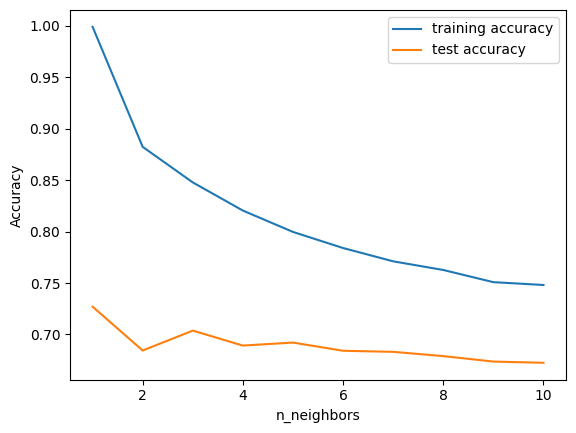

In [65]:
# let's check how many neighbours for best accuracy
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#plt.savefig('knn_compare_model')

In [66]:
# we can see that 1 and 3 neighbours are good choices. But for 1 neighbour 
# usually we find that the bias of the estimate is often low, while the 
# variance is high. 
# see e.g. The Elements of Statistical Learning, 
# by Hastie, Tibshirani and Friedman p. 465, section 13.3
# Let's proceed with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.70


#### Logistic regression

In [72]:
# we import the respective libraries and fit our model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.727
Test set score: 0.720


#### Support Vector Machines (SVM)

In [69]:
# we import the respective SVM libraries and fit our model
from sklearn.svm import SVC
svc1 = SVC(random_state=42)
svc1.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc1.score(X_test, y_test)))

Accuracy on training set: 0.60
Accuracy on test set: 0.59


In [73]:
# Support vecor machines prefer features which are similar in scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc2 = SVC(random_state=42)
svc2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.84


#### Decision Tree

In [74]:
# we import the respective DT libraries and fit our model
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.802


#### Deep Learning

In [75]:
# we import the respective multilayer perceptron (MLP) libraries and fit our model
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(random_state=42)
mlp1.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp1.score(X_test, y_test)))

Accuracy on training set: 0.60
Accuracy on test set: 0.60


In [76]:
# artificial neural networks prefer normal scaled features (0 mean, unit var)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp2 = MLPClassifier(random_state=42, hidden_layer_sizes=(100,))
mlp2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(X_test_scaled, y_test)))

Accuracy on training set: 0.856
Accuracy on test set: 0.846


#### Random Forests

In [77]:
# we import the respective random forest libraries and fit our model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.856


## Accuracy analysis

In [83]:
algorithms = ["Random Forests","Deep Learning","Decision Trees"
    ,"Logistic Regression","k-Nearest Neighbors","Support Vector Machine"]
tests_accuracy = [rf.score(X_test, y_test)
                  ,mlp2.score(X_test_scaled, y_test)
                  ,tree1.score(X_test, y_test)
                  ,logreg.score(X_test, y_test)
                  ,knn.score(X_test, y_test)
                  ,svc2.score(X_test_scaled, y_test)
                  ]
compare_algorithms = pd.DataFrame({ "Algorithms": algorithms, "Tests Accuracy": tests_accuracy })
compare_algorithms.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Tests Accuracy
0,Random Forests,0.855651
1,Deep Learning,0.845730
2,Decision Trees,0.801894
3,Logistic Regression,0.720316
4,k-Nearest Neighbors,0.703716
5,Support Vector Machine,0.516957


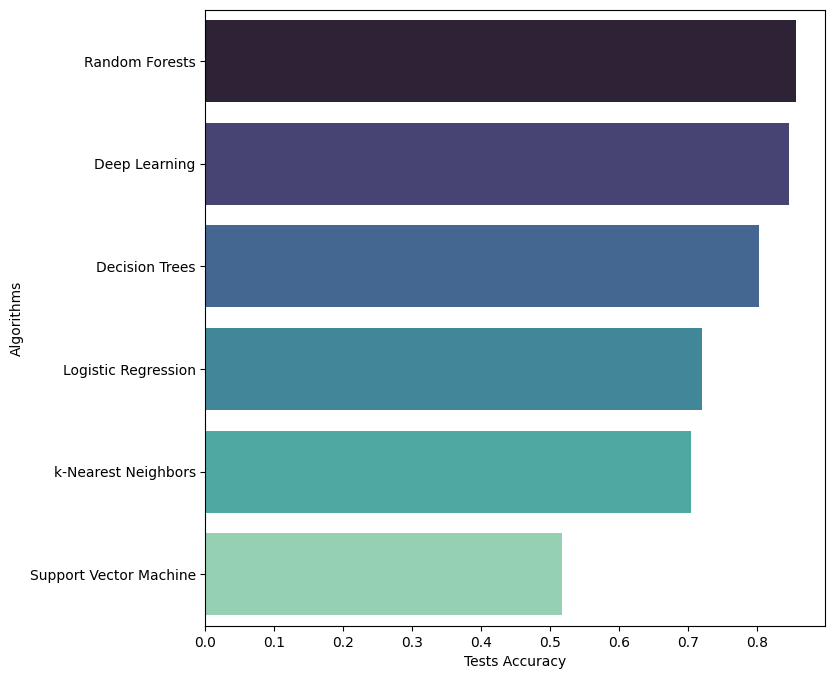

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Accuracy", y = "Algorithms"
    ,data = compare_algorithms, hue="Algorithms", palette="mako")
plt.show()

## Explainable AI (XAI) Approaches

### Model-Specific

#### Random Forests

In [159]:
# let's analyze the classification report of the Random Forests model
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      8434
           1       0.81      0.89      0.85      6987

    accuracy                           0.86     15421
   macro avg       0.86      0.86      0.86     15421
weighted avg       0.86      0.86      0.86     15421



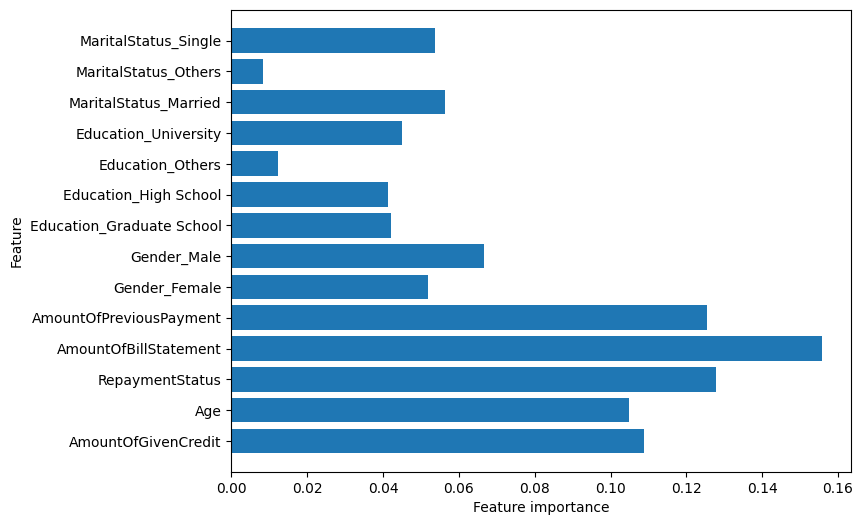

In [160]:
# then, we analyze the feature importance of the RF model
plot_feature_importances_credit(rf)

#### Decision Tree

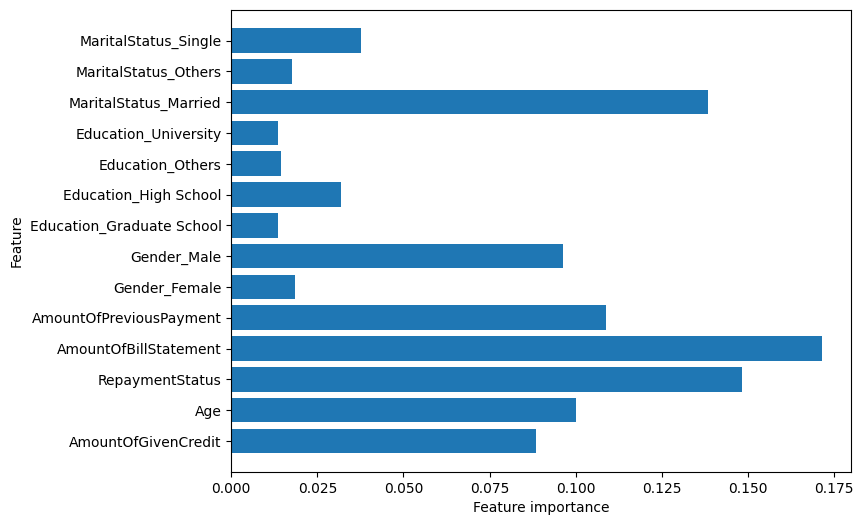

In [102]:
# let's compare this to the feature importance of the decision tree model
def plot_feature_importances_credit(model):
    cc_features = [x for i,x in enumerate(X.columns) if i!= len(X.columns) ]
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cc_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_credit(tree1)
#plt.savefig('feature_importance')

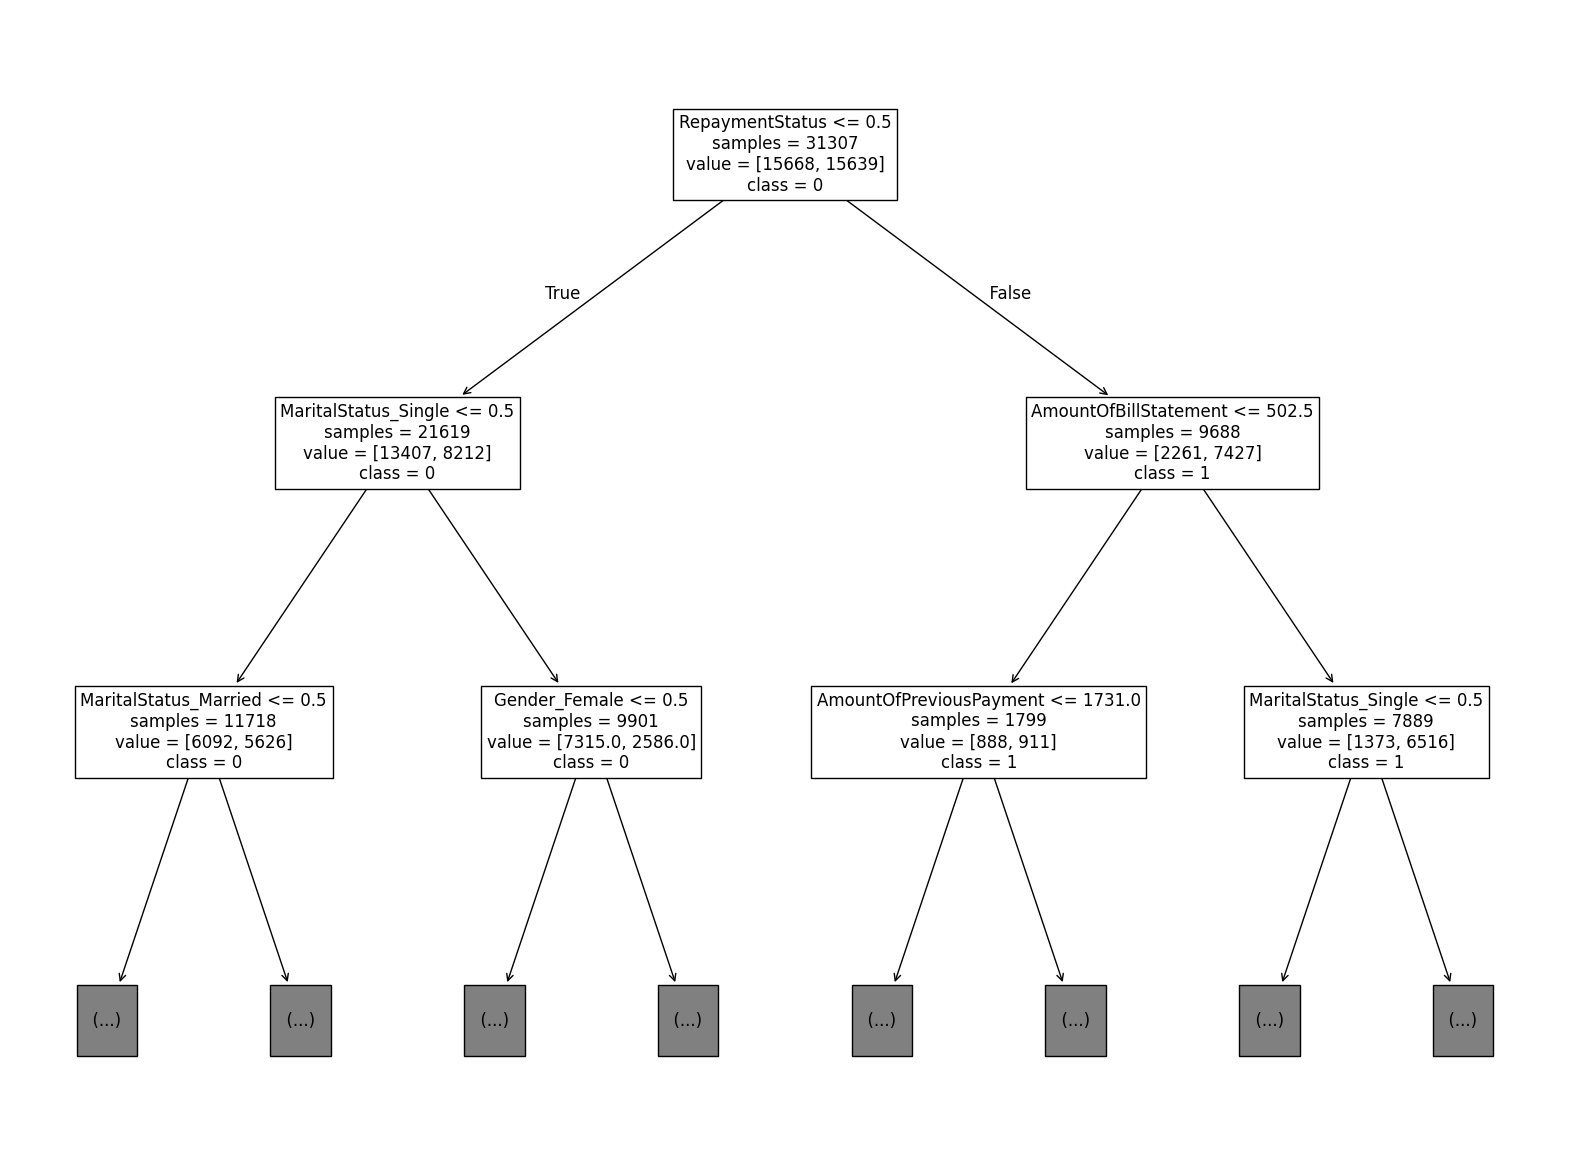

In [171]:
# let us visualize the first six leafs (plus root) of decision tree
from sklearn.tree import plot_tree
cc_features = [x for i,x in enumerate(X.columns) if i!= len(X.columns) ]

fig2 = plt.figure(figsize=(20,15))
_ = plot_tree(tree1
              , feature_names=cc_features
              ,class_names=["0","1"]
              ,filled=False
              ,max_depth=2
              ,impurity=False
              ,fontsize=12
              )

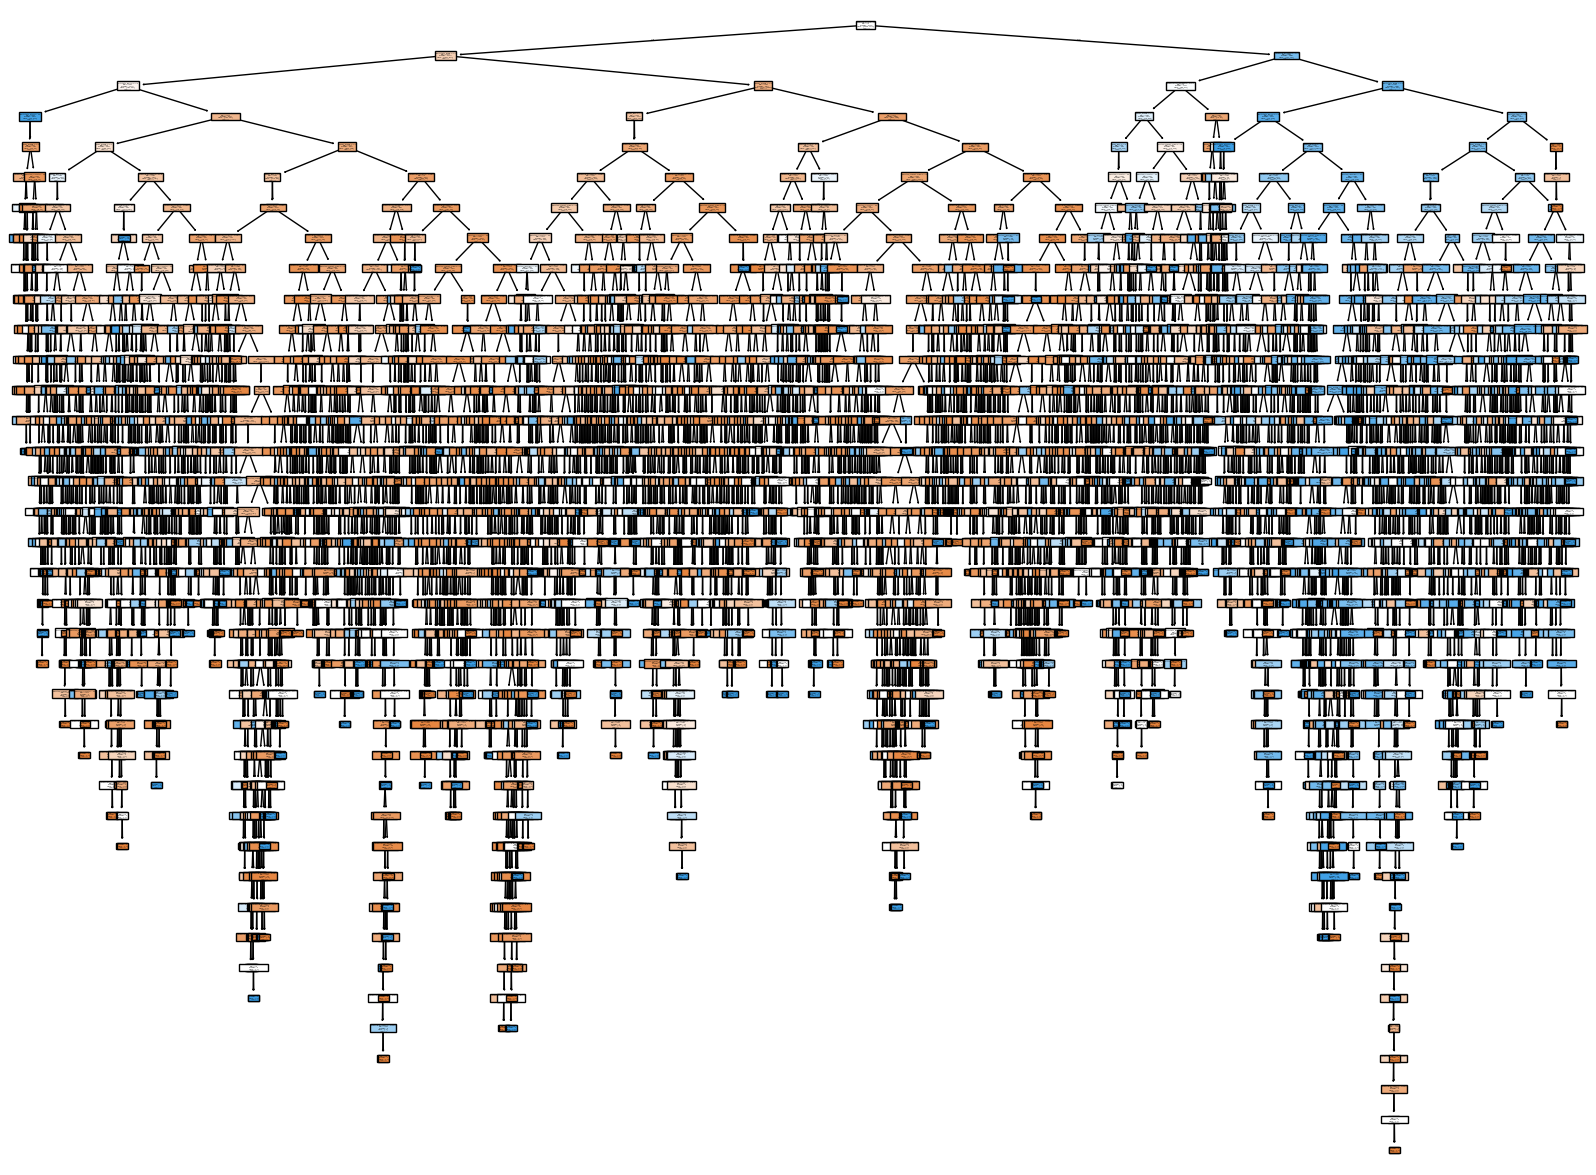

In [111]:
# looking at the whole tree is kind of a bad awakening (remarks in slides)
from sklearn.tree import plot_tree
cc_features = [x for i,x in enumerate(X.columns) if i!= len(X.columns) ]

fig2 = plt.figure(figsize=(20,15))
_ = plot_tree(tree1
              , feature_names=cc_features
              ,class_names=["0","1"]
              ,filled=True
              )

#### Deep Learning

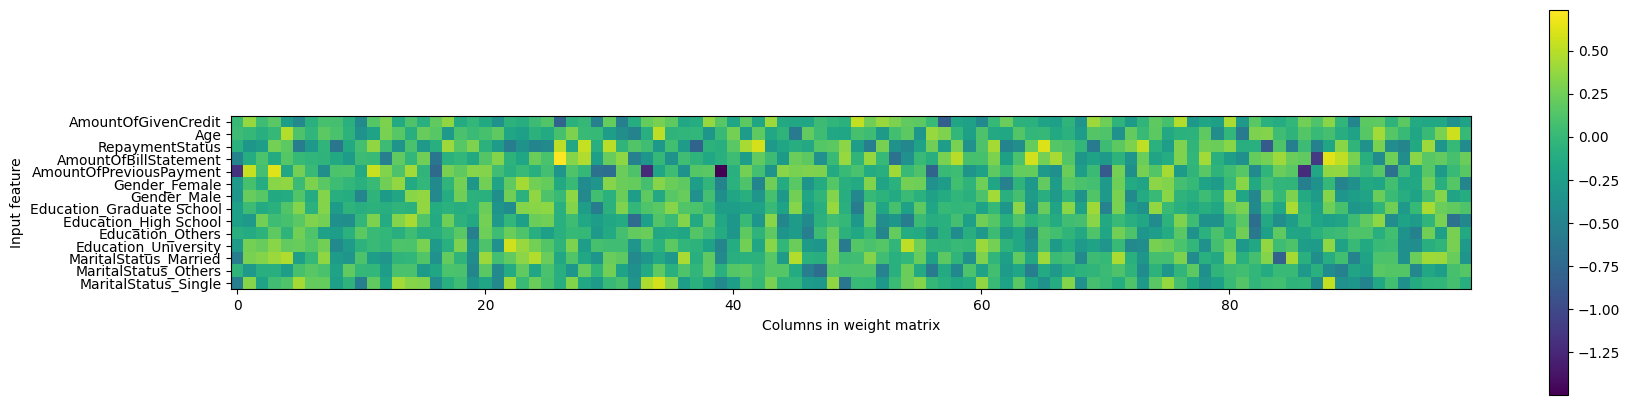

In [112]:
# in this case, the weight matrix of our neural network is visualizable
# but not easy to interpret / yields no big insights
cc_features = [x for i,x in enumerate(X.columns) if i!= len(X.columns) ]
plt.figure(figsize=(20, 5))
plt.imshow(mlp2.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(len(X.columns)), cc_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Model-Agnostic

### Shapley Additive Explanations (SHAP)

In [113]:
import shap

#### SHAP values

In [114]:
# initialize the Kernel Explainer from the SHAP library
# watch out not to use too many data points since the calculation runtime  
# grows exponentially 
explainer_mlp = shap.KernelExplainer(mlp2.predict,X_train.iloc[:200,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [115]:
# get the explanation object from the kernel explainer, keep in mind: runtime
shap_values_mlp = explainer_mlp.shap_values(X_test,nsamples=100)

100%|██████████| 15421/15421 [07:38<00:00, 33.61it/s]


#### Global visualization of SHAP values

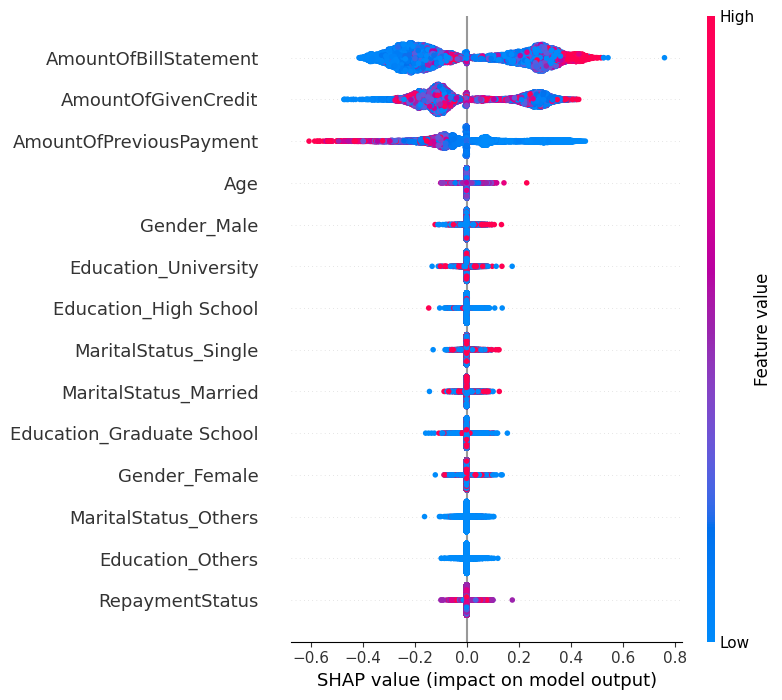

In [108]:
# the summary plot yields very useful insights into the impact of the 
# respective features on the default behaviour (impact on model output)
shap.summary_plot(shap_values_mlp,X_test)

#### Local visualization of feature impact

In [155]:
# we can also analyze the base value of the model (average prediction)
explainer_mlp.expected_value 

0.43500000000000005

In [156]:
# let's take a look at the first set of shap values for the first prediction
shap_values_mlp[0]

array([0.3425, 0.    , 0.    , 0.2225, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [158]:
# ok, some basic copy & paste maths shows if the predition is default or not
0.43500000000000005 + 0.3425 + 0.2225

1.0

In [119]:
# To visualize the local feature impacts, we initialize another explanation
# This is purely for technical reason since the explainer object above 
# was from a legacy part of the SHAP package
explanation = explainer_mlp(X_test.iloc[:200,:])

100%|██████████| 200/200 [04:07<00:00,  1.24s/it]


In [ ]:
# load JS visualization code to notebook
from IPython.display import display
shap.initjs()

In [234]:
# let us take a look at the prediction for the 32th customer in our sample
shap.plots.force(explanation[32])

In [239]:
# here is an example for a customer who was predicted with zero (no default)
shap.plots.force(explanation[59])

In [ ]:
# lastly, let's consider another topic, which is relevant for 
# being compliant with governance and regulations
shap.plots.force(explanation[23])

# Sources and Further Reading
https://www.datacamp.com/de/tutorial/auc <br>
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models <br>
https://www.yourdatateacher.com/2021/05/17/how-to-explain-neural-networks-using-shap/ <br>
https://medium.com/@polanitzer/machine-learning-for-default-of-credit-card-clients-in-taiwan-7336c79b5158 <br>